# Content classifier using embedding provided by OpenAi

**11/29**

- Integret the embedding produced by OpenAI to the model I have built.
- Reframe the origianal design.

**12/12**

- The output of the embedding layer from OpenAI is **1536**, which is decided by the model we choose, the model is **text-embedding-ada-002**.
- Reframe the work

**12/22**

- Successfully run on compute canada.
- Try to train the full set.

In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import os
import glob

## Gather embedding files

Get all the files that have beeen preprocessed.

In [2]:
import numpy as np
data_set = pd.DataFrame()
all_df = []
folder_path = "./embeddings_2/"
for csv_file in glob.glob(os.path.join(folder_path, '*.csv')):
    df_temp = pd.read_csv(csv_file)
    df_temp["X"] = df_temp.X.apply(eval).apply(np.array)
    all_df.append(df_temp)
data_set = pd.concat(all_df, ignore_index=True)

In [7]:
data_set.shape

(4707, 2)

In [3]:
# data_set = data_set.sample(frac=1).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(data_set["X"], data_set["y"], test_size=0.2, random_state=42)

In [4]:
X_train_array = X_train.to_numpy()
X_train_3d = np.stack([x.reshape(-1, 1) for x in X_train_array])
X_test_array = X_test.to_numpy()
X_test_3d = np.stack([x.reshape(-1, 1) for x in X_test_array])

In [5]:
X_train_3d.shape

(3765, 1536, 1)

In [6]:
# embedding_datapath = "fine_food_reviews_with_embeddings_1k.csv"
# df_embedding = pd.read_csv(embedding_datapath, index_col=0)
# train_X_benign = df_embedding['embedding']

In [8]:
model = Sequential()
#!!! change the size of input to 
# model.add(Embedding(max_num, embedding_vecor_length, input_length=max_review_length))
# model.add(Dropout(0.2))
# model.add(LSTM(100))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

In [9]:
history = model.fit(X_train_3d, y_train, epochs=50, batch_size=64,shuffle=True, validation_data=(X_test_3d, y_test))
# # Access the history data
# training_loss = history.history['loss']
# training_accuracy = history.history['accuracy']

# # If validation data was used, you can also access validation loss and accuracy
# validation_loss = history.history.get('val_loss')
# validation_accuracy = history.history.get('val_accuracy')

Epoch 1/50
59/59 [==============================] - 43s 718ms/step - loss: 0.6637 - accuracy: 0.6335 - val_loss: 0.6502 - val_accuracy: 0.6476
Epoch 2/50
59/59 [==============================] - 41s 704ms/step - loss: 0.6566 - accuracy: 0.6348 - val_loss: 0.6479 - val_accuracy: 0.6476
Epoch 3/50
59/59 [==============================] - 42s 712ms/step - loss: 0.6850 - accuracy: 0.6085 - val_loss: 0.6954 - val_accuracy: 0.6476
Epoch 4/50
59/59 [==============================] - 42s 715ms/step - loss: 0.6745 - accuracy: 0.5976 - val_loss: 0.6835 - val_accuracy: 0.6476
Epoch 5/50
59/59 [==============================] - 41s 696ms/step - loss: 0.6659 - accuracy: 0.6348 - val_loss: 0.6516 - val_accuracy: 0.6476
Epoch 6/50
59/59 [==============================] - 42s 712ms/step - loss: 0.6585 - accuracy: 0.6348 - val_loss: 0.6541 - val_accuracy: 0.6476
Epoch 7/50
59/59 [==============================] - 43s 727ms/step - loss: 0.6586 - accuracy: 0.6348 - val_loss: 0.6566 - val_accuracy: 0.6476

In [10]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)
history_df.to_csv('./history/training_history_openai_fullsets_1.csv', index=False)

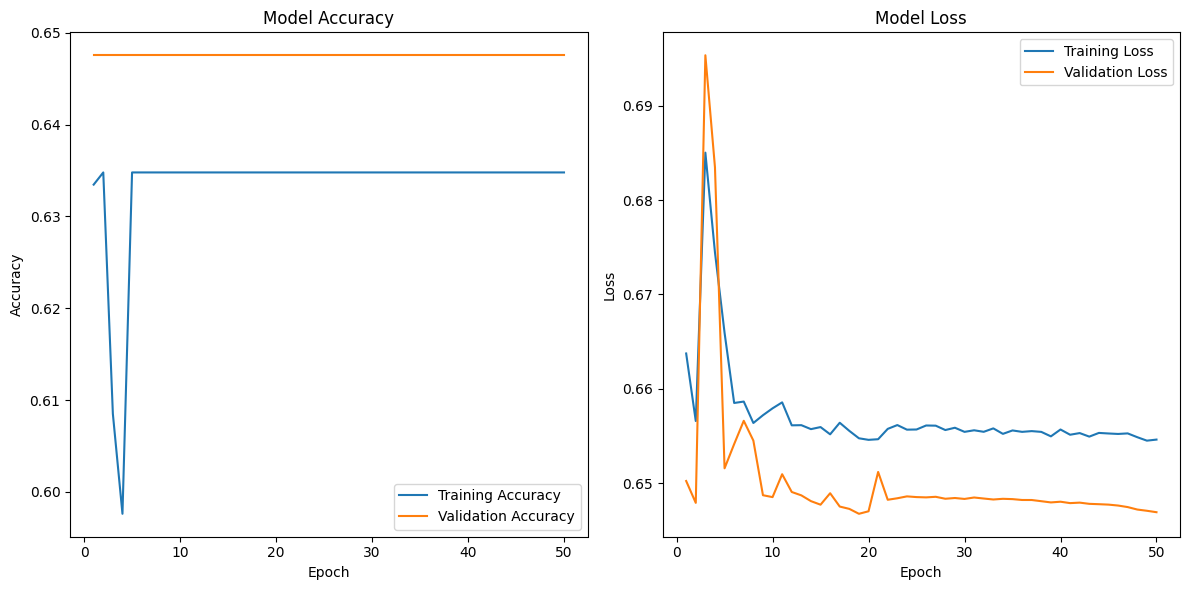

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history_df:
    plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
if 'val_loss' in history_df:
    plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()
